# networkx Part 2 : Directed graphs

<font color='blue'><b>Goals of this notebook:</b></font>
Learn how to create directed graphs.

<font color='blue'><b>Prerequisites:</b></font>
Know how to build and draw graphs (see part 1 of this tutorial).

<font color='blue'><b>Python packages required:</b></font>
`networkx`

<font color='blue'><b>Additional resources:</b></font> 
For more on networkx, see https://networkx.github.io/documentation/stable/.


Many graphs have directions on the edges (edges with directions are called arcs).
We can create these 'digraphs' using `networkx` in the same way as undirected graphs. 

<b>Step 1</b> Import `networkx`.

<b>Step 2</b> Create an empty digraph.

<b>Step 3</b> Add nodes and arcs. 

Let's illustrate these steps using the following digraph:

$$
\begin{array}{rcl}
\text{Nodes} &=& \{\text{A}~,\text{L},~\text{P},~\text{H},~\text{B},~\text{E},~\text{T}\}\\
\text{Arcs} &=&\{(u,v) : \text{ if } u \text{ comes directly before } v \text{ in the word ALPHABET}\}.
\end{array}
$$

<b>Steps 1 and 2</b> Import `networkx` and create an empty digraph.

These steps are almost identical to the steps for an undirected graph. 
The only difference is that we create an empty digraph using the command 

`G = nx.DiGraph()`.

Run the following code to import `networkx` and create an empty digraph.

In [1]:
# Import networkx and run the magic command for later inline drawings
import networkx as nx
%matplotlib inline

# Create an empty digraph
G = nx.DiGraph()

<b>Step 3</b> Add nodes and arcs

These commands are exactly the same as they are for undirected graphs!
However, the order of the nodes is important when we add an arc. 
The first node becomes the tail of the arc and the second node becomes the head of the arc. 
For example, the command

`G.add_edge("A", "L")`

will create an arc starting at `A` and pointing to `L`.

<font color='red'><b>Note:</b></font>
If a node is labeled with a letter or a word, then we must add it using quotation marks. For example, the command `G.add_node("A")` adds node A.

<font color='red'><b>Note:</b></font>
If we try to add two nodes with the same label, then Python will only keep one copy of the node.

Run the following code to add the nodes and arcs of `G`.

In [2]:
# Create the nodes and arcs 
letters = ["A","L","P","H","A","B","E","T"]

G.add_nodes_from(letters)

for i in range(0, 7):
    G.add_edge(letters[i], letters[i+1])
    
# Print the nodes and arcs of G

print(f'The nodes of G are {G.nodes}.')
print(f'The arcs of G are {G.edges}.')

The nodes of G are ['A', 'L', 'P', 'H', 'B', 'E', 'T'].
The arcs of G are [('A', 'L'), ('A', 'B'), ('L', 'P'), ('P', 'H'), ('H', 'A'), ('B', 'E'), ('E', 'T')].


We can draw `G` using the same command as before:

`nx.draw(G, with_labels = True, pos = node_pos, node_color = 'lightblue', arrowsize=20)` 

Here we see a new optional input `arrowsize=20` to the `nx.draw()` command.
The arcs of `G` are denoted with arrows, and this input lets us choose their size. 

Run the following code to draw `G`.

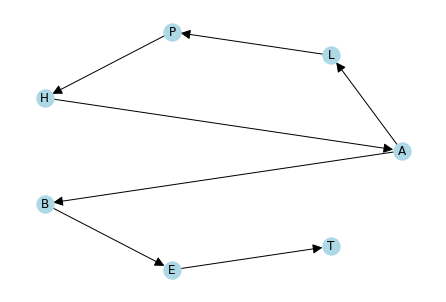

In [3]:
# Fix a position of the nodes
node_pos = nx.circular_layout(G)

# Draw G
nx.draw(G, with_labels = True, pos = node_pos, 
        node_color = 'lightblue', arrowsize=20)

# Note: There might be a deprecation warning appearing; it comes from code in the networkx package, so we cannot do much about it.

Digraphs have more properties than undirected graphs.
For example, a node `v` in a directed graph has an in degree and an out degree. 
These are accessed using the commands 

`H.in_degree(v)` and `H.out_degree(v)`.

We can view the nodes that `v` points to using 

`H.successors(v)`

and the nodes that point to `v` using 

`H.predecessors(v)`

<font color='red'><b>Note:</b></font> The commands `H.successors(v)` and `H.predecessors(v)` return dictionaries. We can turn these into lists using `list(H.successors(v))`.

Run the following code to check the in and out degree of `A` and print its successors/predecessors. 

In [5]:
# Print the in degree and predecessors of A.
print(f'The in degree of node A is {G.in_degree("A")}.')
print(f'The predecessors of node A are {list(G.predecessors("A"))}.')

# Print the out degree and successors of A.
print(f'The out degree of node A is {G.out_degree("A")}.'.format())
print(f'The successors of node A are {list(G.successors("A"))}.')

The in degree of node A is 1.
The predecessors of node A are ['H'].
The out degree of node A is 2.
The successors of node A are ['L', 'B'].


Another useful thing is to turn a digraph into an undirected graph. 
We can do this using the command 

`G_undirected = nx.Graph(G)`. 

Run the following commands to turn `G` into an undirected graph.

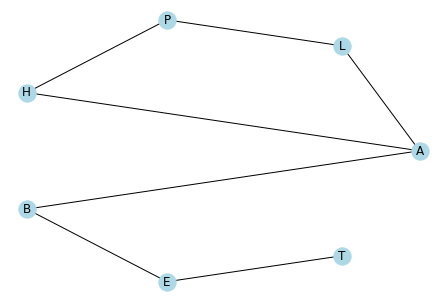

In [6]:
# Turn G into an undirected graph
G_undirected = nx.Graph(G)

# Draw G_undirected
nx.draw(G_undirected, with_labels = True, pos = node_pos, 
            node_color = 'lightblue')

Now you know the basics of digraphs! 
Let's practice these with a few more examples.

#### Example: Shortest paths in a graph

For this example, we will use the following digraph:

$$
\begin{array}{rcl}
\text{Nodes} &=& \{1, \dotsc, 20\}\\
\text{Arcs} &=& \left\{(u,v)~ | ~ u < v \text{ and at least one of the following holds:}~~
\begin{array}{l}
v-u\equiv 0 \pmod{7} ~~\text{or }\\
v-u\equiv 3 \pmod{5}
\end{array}\right\}.
\end{array}
$$

Run the following code to build and draw `H`. We have already imported `networkx`, so we only need to run <b>Steps 2 - 3</b>.  

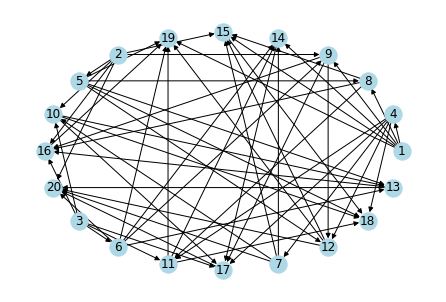

In [7]:
# Create an empty digraph
H = nx.DiGraph()

# Add the nodes and arcs
for u in range(1, 21):
    for v in range(u+1, 21):
        if abs(v-u) % 7 == 0 or abs(v-u) % 5 == 3:
            H.add_edge(u,v)

# Draw H
node_pos_H = nx.circular_layout(H)

nx.draw(H, with_labels = True, pos = node_pos_H, 
            node_color = 'lightblue', arrowsize=10)

In this example we want to check if there is a path from `1` to `20` in `H`.
Recall that a path in a digraph can only visit a node or arc at most once, and a path must travel along an arc in the direction that it points.

One way to check if a path exists is to use the BFS algorithm starting at `1`. 

Run the following commands to run BFS starting at `1`.

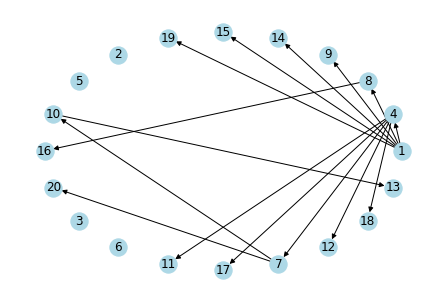

In [8]:
# Run BFS starting at 1
arcs_from_BFS = list(nx.bfs_edges(H,1))

# Draw H with BFS arcs
nx.draw(H, with_labels = True, pos = node_pos_H, 
        edgelist = arcs_from_BFS, node_color = 'lightblue', arrowsize=10)

Note that there is an arc pointing to `20` in this sub-digraph.
This means that there is a path from `1` to `20`. 
From the picture we can see that `1,4,7,20` is the a path from `1` to `20`.

Another way of finding a path from `1` to `20` is to use the shortest path command in `networkx`.
This command is 

`nodes_short_path = nx.shortest_path(H, source=1, target=20)` 

This command returns a list of the nodes taken on the shortest path and stores it in `nodes_short_path`.

Run the following command to run the shortest path algorithm.

In [10]:
# Run a shortest path algorithm from 1 to 20.
nodes_short_path = nx.shortest_path(H, source = 1, target = 20)

# Print the nodes on the shortest path
print(f'A shortest path from 1 to 20 is {nodes_short_path}.')

A shortest path from 1 to 20 is [1, 4, 7, 20].


#### Example: Longest paths in a digraph

Consider the digraph `H` from the previous example.
Instead of finding a short path in `H`, what if we want to find the longest path between any two nodes in `H`?
Note that there are no cycles in `H` because every arc `(u,v)` satisfies `u < v`.

From the previous example, we know that there is a path of length four between `1` and `20`.
However, it is not obvious from the previous drawing that there is a longer path in `H`.
Let us redraw `H` to see if we can visualize a longer path.
Intuitively, the longest path will start at a node with no incoming arcs and end at a node with no outgoing arcs. 

Run the following line of code to find these two sets of nodes.

In [11]:
# Find the nodes without incoming arcs
for u in H.nodes:
    if H.in_degree(u) == 0:
        print(f'{u} has no incoming arcs.')

                
# Find the nodes without outgoing arcs
for u in H.nodes:        
    if H.out_degree(u) == 0:
        print(f'{u} has no outgoing arcs.')

1 has no incoming arcs.
2 has no incoming arcs.
3 has no incoming arcs.
19 has no outgoing arcs.
20 has no outgoing arcs.
18 has no outgoing arcs.


So there are three nodes without incoming arcs and three nodes without outgoing arcs.
Let us redraw `H` so that the nodes form columns of three nodes each. 
This will require us to create new node positions to replace ` node_pos_H`. 
We will create these new positions manually by providing specific coordinates for where we want the nodes to be drawn. 
We will call these new positions `new_node_pos_H`.
If we want to set the coordinates of node `u` to be `(x,y)`, then we use the command

`new_pos_H[u] = (x,y)`

<font color='red'><b>Note:</b></font> The positions in `networkx` are relative, so changing the coordinates might not necessarily yield the result that you want. However, it is not important to know how to draw graphs perfectly with `networkx`. It is usually enough to just use the preset layouts such as `circular_layout` in `networkx`.

Run the following lines of code to create new node positions and redraw `H`.

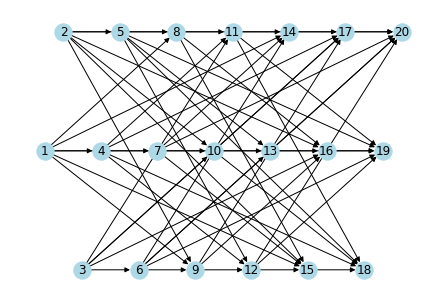

In [12]:
# Create new node positions
new_pos_H = {}

for u in H.nodes:
    new_pos_H[u] = ( u/3 , u % 3)

# Redraw H
nx.draw(H, with_labels = True, pos = new_pos_H, 
        node_color = 'lightblue', arrowsize=10)

These new node positions show us that there are paths with more than four nodes. 
The paths `1,4,7,10,13,16,19` and `2,5,8,11,14,17,20` each have seven nodes!

We can find the longest path using the `networkx` commmand `nx.dag_longest_path(H)`. Here, `dag` refers to a directed acyclic graph.

Run the following line of code to find a longest path in `H`.

In [13]:
# Find a longest path in H

long_path = nx.dag_longest_path(H)

print(f'A longest path in H is {long_path}.')

A longest path in H is [2, 5, 8, 11, 14, 17, 20].


## Conclusions

Digraphs in `networkx` are created in almost the same way as undirected graphs and drawn in exactly the same way. Part 3 of this tutorial introduces how to use attributes such as weight for edges/arcs and nodes.